# Task 2 - Prediction using Unsupervised ML

Name : MIHIR RADADIYA


Data Science & Business Analytics Internship


GRIP March2020

## Loading Libraries

In [1]:
# Importing all the Libraries
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Dataset 

In [2]:
# Loading the csv Dataset file
df = pd.read_csv('Iris.csv')
print('Shape:', df.shape)
df.head()

Shape: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Visulization of Data

<Figure size 432x288 with 0 Axes>

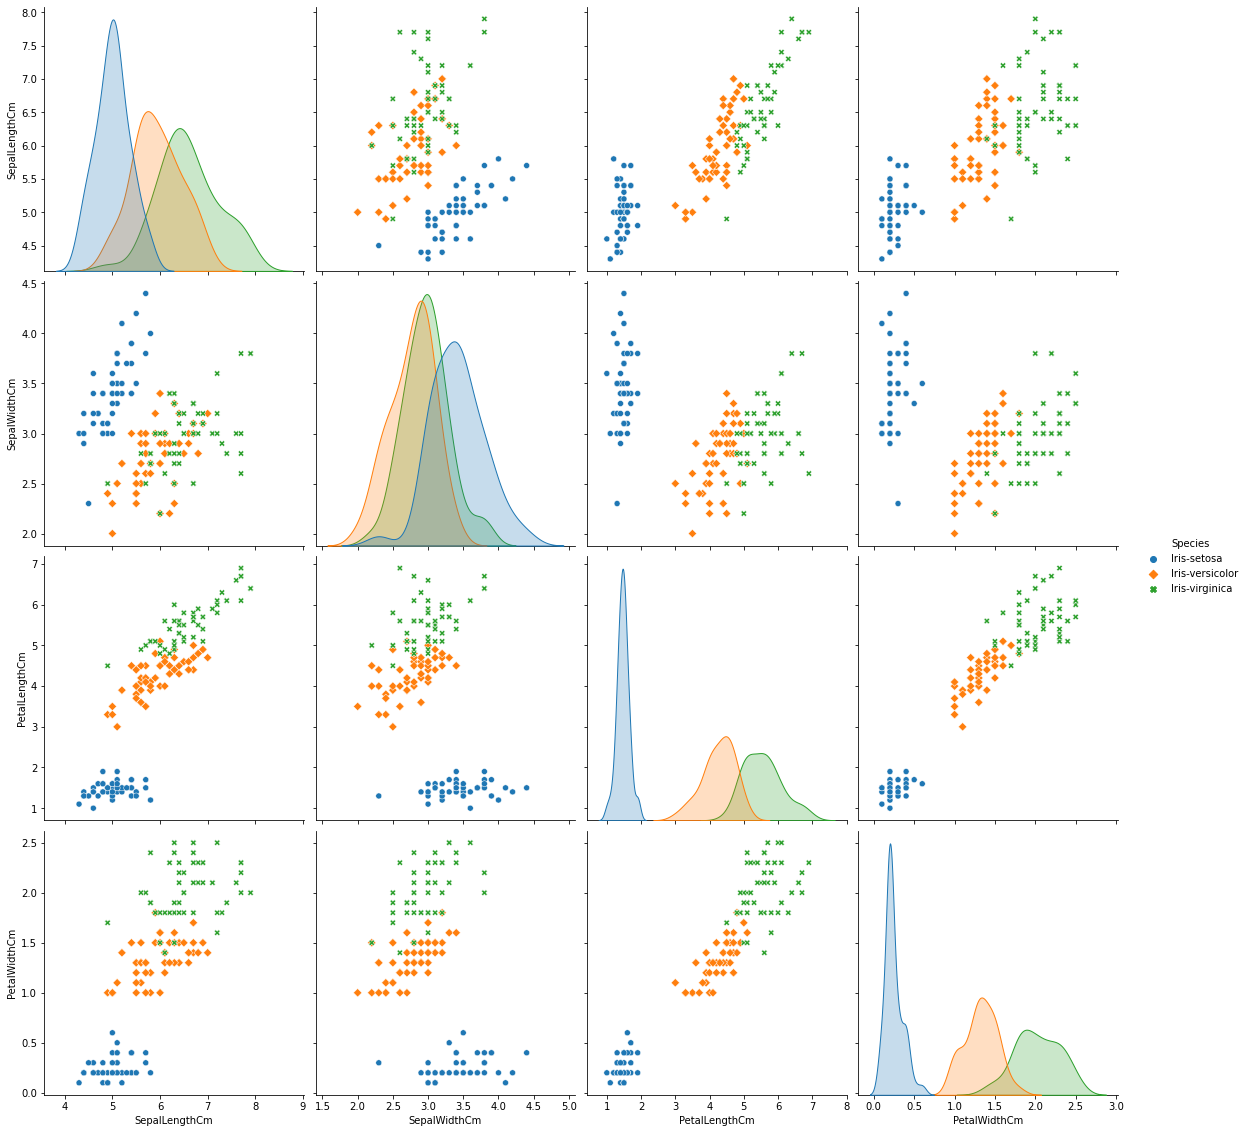

In [3]:
# Data visulization
plt.figure()
sns.pairplot(df.drop("Id", axis=1), hue="Species", height=4, markers=["o", "D", "X"])
plt.show()

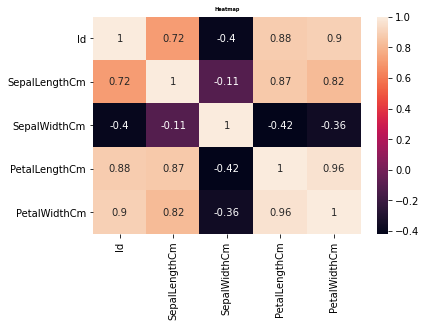

In [4]:
#plotting Heatmap
plt.figure()
sns.heatmap(df.corr(), annot=True)
plt.title('Heatmap', fontsize=5, fontweight='bold')
plt.show()

## Data Preparation

In [5]:
x = df.iloc[:, [1, 2, 3, 4]].values
y = df['Species'].values
encoder = LabelEncoder()
ylabel = encoder.fit_transform(y)
ylabel

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Elbow method

In [7]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)

## Graph of Elbow Method

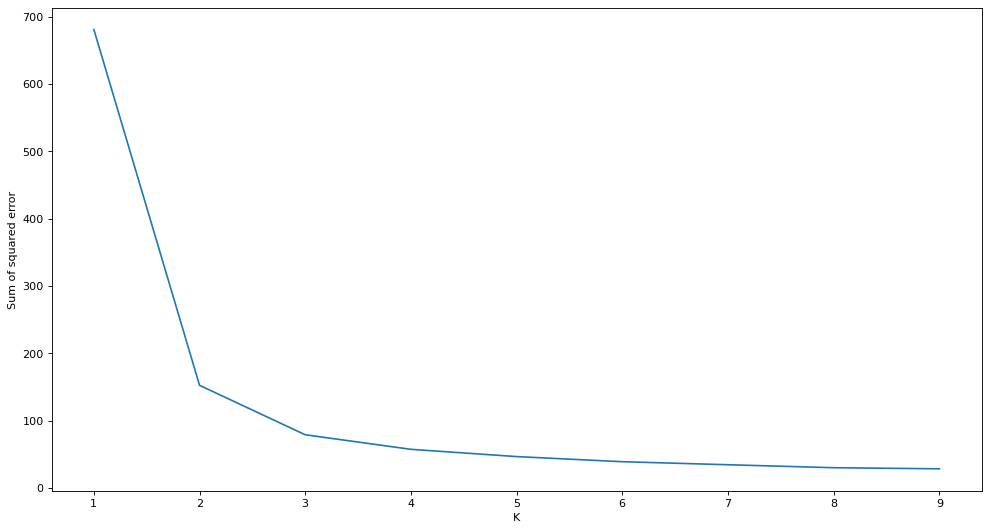

In [8]:
plt.figure(figsize=(15, 8), dpi=80)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

By seeing above graph of 'Elbow Method', the optimum clusters is where the elbow occurs. we conclude that optimal number of cluster for given dataset is 3.

## K-Means Clustering

In [9]:
# K-Means Clustering
km = KMeans(n_clusters=3)
ypred = km.fit_predict(x)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

## Cluster Centers

In [10]:
# cluster centers
centers = km.cluster_centers_
centers

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

## Visualising the clusters along with Centroids

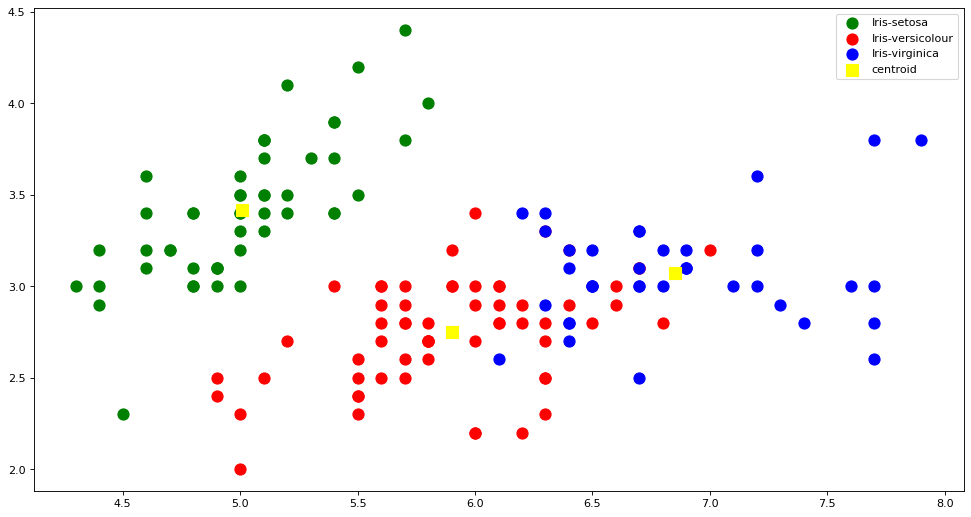

In [11]:
plt.figure(figsize=(15, 8), dpi=80)
plt.scatter(x[ypred == 0, 0], x[ypred == 0, 1], s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[ypred == 1, 0], x[ypred == 1, 1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[ypred == 2, 0], x[ypred == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='s',s = 100,label='centroid')
plt.legend()

## Accuracy

In [12]:
# Accuracy
print('Classification Report\n', classification_report(ylabel, ypred))
accuracy = accuracy_score(ylabel, ypred) * 100
print('K-Means Accuracy:', str(round(accuracy, 2)) + '%')

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

K-Means Accuracy: 89.33%
